In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('project file.csv')

In [8]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [9]:
# Clearing the inconsistency in the Height column
df['Height'] = np.random.randint(150, 180, size=len(df))

In [10]:
df['Salary'].fillna(df['Salary'].mean(), inplace=True)
df['Salary']= df['Salary'].astype(int)

<ipython-input-10-d68213cfbe81>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].mean(), inplace=True)


In [11]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,159,180,Texas,7730337
1,Jae Crowder,Boston Celtics,99,SF,25,150,235,Marquette,6796117
2,John Holland,Boston Celtics,30,SG,27,152,205,Boston University,4833969
3,R.J. Hunter,Boston Celtics,28,SG,22,154,185,Georgia State,1148640
4,Jonas Jerebko,Boston Celtics,8,PF,29,160,231,NaN,5000000


In [13]:
#  Determine the distribution of employees across each team
team_distribution = df['Team'].value_counts()
team_distribution

,count
Team,
New Orleans Pelicans,19
Memphis Grizzlies,18
Utah Jazz,16
New York Knicks,16
Milwaukee Bucks,16
Brooklyn Nets,15
Portland Trail Blazers,15
Oklahoma City Thunder,15
Denver Nuggets,15


In [14]:
total_employees =  len(df)
percentage_distribution = (team_distribution / total_employees) * 100
percentage_distribution

,count
Team,
New Orleans Pelicans,4.148472
Memphis Grizzlies,3.930131
Utah Jazz,3.493450
New York Knicks,3.493450
Milwaukee Bucks,3.493450
Brooklyn Nets,3.275109
Portland Trail Blazers,3.275109
Oklahoma City Thunder,3.275109
Denver Nuggets,3.275109


In [15]:
#print the employees in each position
position_distribution = df['Position'].value_counts()
position_distribution

,count
Position,
SG,102
PF,100
PG,92
SF,85
C,79


In [16]:
# Identify age group among employees

bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

# Create a new column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_distribution = df['Age_Group'].value_counts()
age_group_distribution

,count
Age_Group,
25-34,272
18-24,154
35-44,32
45-54,0
55-64,0


In [23]:
#Identify whcich team and position have highest salary
highest_salary_team = df.groupby('Team')['Salary'].mean().idxmax()
highest_salary_position = df.groupby('Position')['Salary'].mean().idxmax()
print(f"The higest  salaried team  is {highest_salary_team}")
print(f"The highest salaried position is { highest_salary_position}")

The higest  salaried team  is Cleveland Cavaliers
The highest salaried position is C


In [24]:
#check whether there is any correlation between age and salary and visually represent them
correlation = df['Age'].corr(df['Salary'])
print(f"The correlation between age and salary is {correlation}")

The correlation between age and salary is 0.21116954871839136


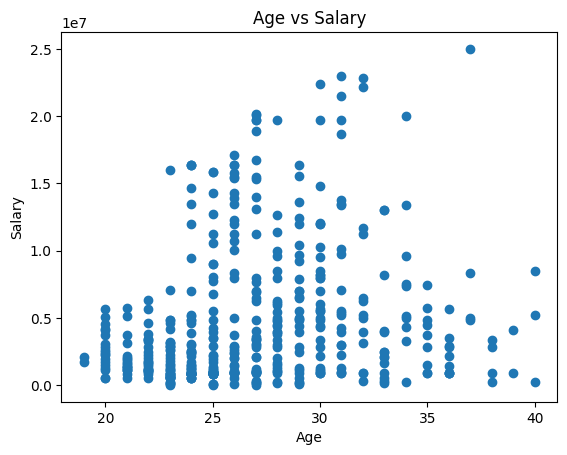

In [25]:
#visual representation of the correlaton between age and salary
plt.scatter(df['Age'], df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()
